In [ ]:
# Importing all the required Module for DATA ANALYSIS
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

## Load the seeds.csv file into a pandas data frame.

In [2]:
# Getting the CSV dataset
dataset = pd.read_csv("seeds.csv")
# showing the top 5 rows of the dataset
dataset.head()

,area,perimeter,compactness,length,width,asymmetry,groove length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175


## Explore the data

In [3]:
dataset.describe()

,area,perimeter,compactness,length,width,asymmetry,groove length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871000,5.628533,3.258605,3.700200,5.408071
std,2.909699,1.305959,0.023594,0.443063,0.377714,1.503559,0.491480
min,10.590000,12.410000,0.808000,4.899000,2.630000,0.765000,4.519000
25%,12.270000,13.450000,0.857250,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873500,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887750,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918000,6.675000,4.033000,8.456000,6.550000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
area             210 non-null float64
perimeter        210 non-null float64
compactness      210 non-null float64
length           210 non-null float64
width            210 non-null float64
asymmetry        210 non-null float64
groove length    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
# this shows the names of the Column in the Pandas Dataframe.
print("Column Name are : \n",dataset.columns.values)

Column Name are : 
 ['area' 'perimeter' 'compactness' 'length' 'width' 'asymmetry'
 'groove length']


In [6]:
print("Total Rows = ",dataset.shape[0],"\nTotal Columns = ",dataset.shape[1])

Total Rows =  210 
Total Columns =  7


In [7]:
# This shows the number of NA values in each column
dataset.isna().sum()

area             0
perimeter        0
compactness      0
length           0
width            0
asymmetry        0
groove length    0
dtype: int64

## find a way to cluster the seeds

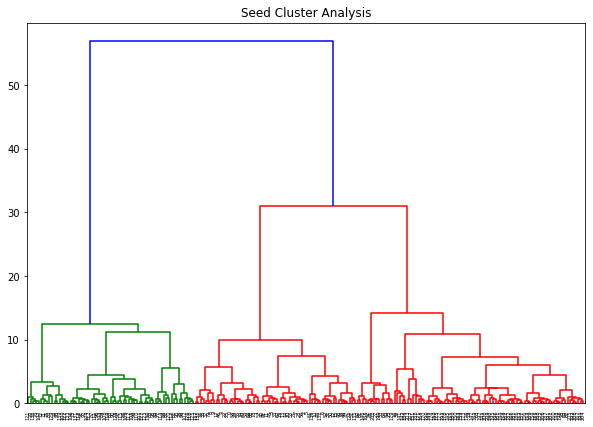

In [8]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Seed Cluster Analysis")
dend = shc.dendrogram(shc.linkage(dataset, method='ward'))

In [9]:
# From the previous grapth we can clearly see that there 3 clusters in the dataset.
# kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
# kmeans.fit(dataset)

In [10]:
# Reducing the Dimetionality of the dataset to 2 columns
pca_2d =PCA(n_components=2).fit_transform(dataset)

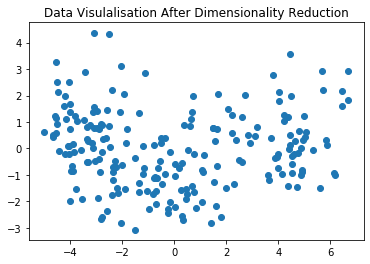

In [11]:
# Plotting the pca data to visualize the 2d Data
plt.scatter(pca_2d[:,0],pca_2d[:,1])
plt.title("Data Visulalisation After Dimensionality Reduction")
plt.show()

## Assigning a cluster to each. Visualise the results, and explain why you have applied the method you have used

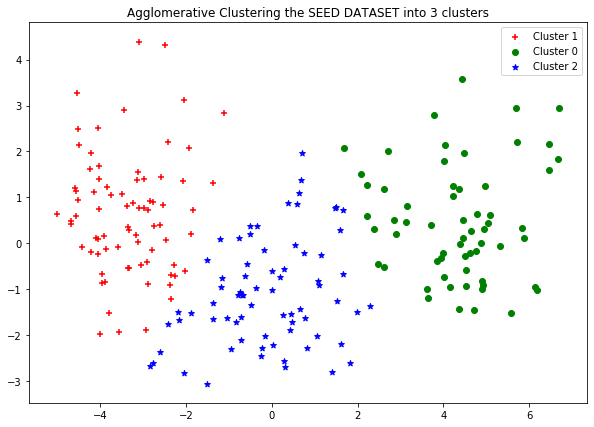

In [12]:
# Applying K mean Clustering with 3 clusters and then plotting each clusters
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(pca_2d)
plt.figure(figsize=(10, 7))
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif kmeans.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
plt.legend([c1, c2, c3],['Cluster 1', 'Cluster 0','Cluster 2'])
plt.title('Agglomerative Clustering the SEED DATASET into 3 clusters')
plt.show()

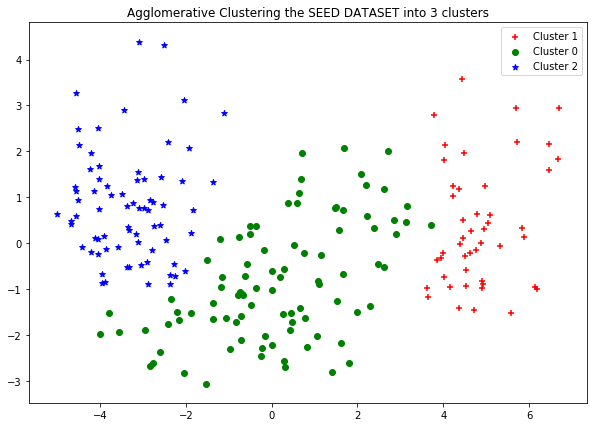

In [13]:
# Using AgglomerativeClustering to cluster the dataset into 3 clusters and then plotting clusters
from sklearn.cluster import AgglomerativeClustering

# Reducing the Dimetionality of the dataset to 2 columns
pca_2d =PCA(n_components=2).fit_transform(dataset)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(pca_2d)
plt.figure(figsize=(10, 7))
for i in range(0, pca_2d.shape[0]):
    if cluster.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif cluster.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif cluster.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
plt.legend([c1, c2, c3],['Cluster 1', 'Cluster 0','Cluster 2'])
plt.title('Agglomerative Clustering the SEED DATASET into 3 clusters')
plt.show()